In [1]:
# %reload_ext autoreload
%matplotlib inline
# %autoreload 2

In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

/opt/conda/lib/python3.7/site-packages/fastbook/__init__.py:22: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


In [3]:
from fastbook import *

In [4]:
# from eeron_tiedostot import *

# Loading Data

In [5]:
dls = ImageDataLoaders.from_folder(path = "data/train_sample",
                                  valid_pct = 0.2, 
                                  seed = 1991,
                                  item_tfms = Resize(448),
                                  batch_tfms = aug_transforms(),
                                  bs = 64)

# Exploring Data

In [6]:
dls.vocab

(#5) ['DOL','LAG','NoF','OTHER','SHARK']

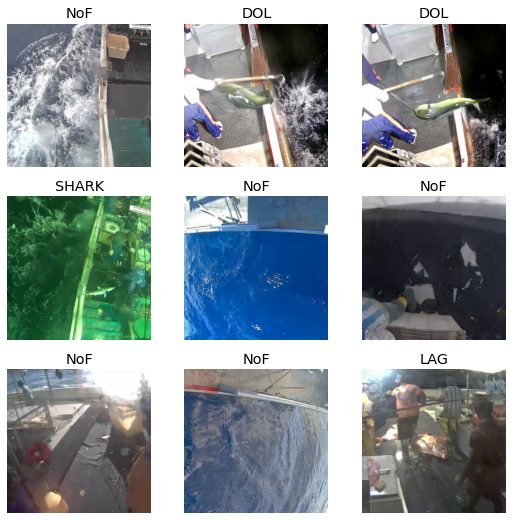

In [8]:
dls.show_batch()

In [9]:
amounts = {}

In [10]:
for item in dls.train_ds:
    category_number = int(item[1])
    category_name = dls.vocab[category_number]
    amounts[category_name] = amounts.get(category_name, 0) + 1

In [11]:
amounts

{'NoF': 380, 'OTHER': 239, 'DOL': 98, 'SHARK': 129, 'LAG': 54}

# Initial Predictions

In [55]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)

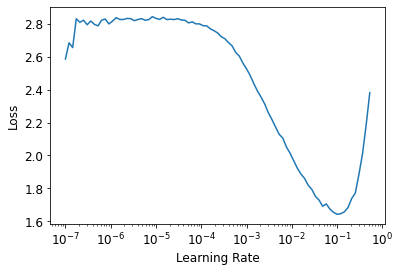

In [56]:
lr_min,lr_steep = learn.lr_find()

In [57]:
print(f"Minimum loss/10 {lr_min:.2e}, Steepest point {lr_steep:.2e}")

Minimum loss/10 1.00e-02, Steepest point 6.31e-03


In [58]:
learn.fit_one_cycle(5,lr_steep)

epoch,train_loss,valid_loss,accuracy,time
0,1.486433,1.126759,0.754464,00:24
1,0.986864,0.308373,0.919643,00:24
2,0.667544,0.248259,0.933036,00:23
3,0.485300,0.252208,0.933036,00:24
4,0.377542,0.219458,0.946429,00:24


In [59]:
learn.save("resnet34_stage1")

Path('data/train_sample/models/resnet34_stage1.pth')

In [60]:
learn.load("resnet34_stage1")

In [62]:
doc(learn.fit_one_cycle)

In [65]:
doc(dls.test_dl)

In [68]:
test_items = get_image_files(Path("data/test_stg2"))

In [69]:
test_dl = dls.test_dl(test_items)

In [73]:
doc(learn.get_preds)

In [76]:
preds,_ = learn.get_preds(dl=test_dl)

In [78]:
preds[0]

tensor([0.2030, 0.4972, 0.0184, 0.1628, 0.1187])

In [77]:
len(preds)

12153

In [19]:
learn.unfreeze()

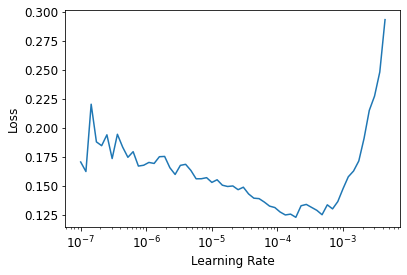

In [20]:
lr_min, lr_steep = learn.lr_find()

In [21]:
print(f"Minimum loss/10: {lr_min:.2e} Steepest point: {lr_steep:.2e}")

Minimum loss/10: 1.91e-05 Steepest point: 6.31e-07


In [22]:
learn.fit_one_cycle(5, lr_max = lr_min)

epoch,train_loss,valid_loss,error_rate,time
0,0.173751,0.211804,0.044643,00:32
1,0.153119,0.253489,0.053571,00:32
2,0.133332,0.228189,0.049107,00:32
3,0.118165,0.191541,0.040179,00:32
4,0.107290,0.207498,0.049107,00:32


In [48]:
learn.fit_one_cycle(5, lr_max = lr_min)

epoch,train_loss,valid_loss,error_rate,time
0,0.078704,0.187964,0.044643,00:31
1,0.082852,0.152477,0.026786,00:32
2,0.075825,0.172374,0.040179,00:32
3,0.066382,0.167455,0.031250,00:32
4,0.061232,0.170906,0.035714,00:32


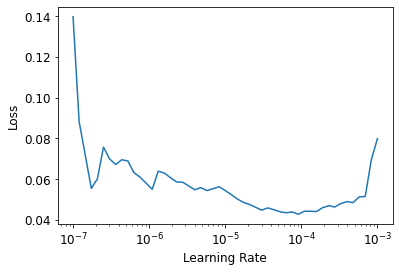

In [49]:
lr_min, lr_steep = learn.lr_find()

In [50]:
learn.save("resnet34_stage3")

Path('data/train_sample/models/resnet34_stage3.pth')

In [51]:
learn.fit_one_cycle(10, lr_max = lr_min)

epoch,train_loss,valid_loss,error_rate,time
0,0.050640,0.164181,0.031250,00:32
1,0.049319,0.171184,0.035714,00:32
2,0.048711,0.184475,0.035714,00:32
3,0.048097,0.163117,0.031250,00:32
4,0.050378,0.155541,0.031250,00:32
5,0.041394,0.158122,0.031250,00:32
6,0.040873,0.151498,0.031250,00:32
7,0.039904,0.159389,0.031250,00:32
8,0.037256,0.164406,0.031250,00:32
9,0.034900,0.159499,0.031250,00:32


In [23]:
learn.save("resnet34_stage2")

Path('data/train_sample/models/resnet34_stage2.pth')

In [24]:
learn.load("resnet34_stage2")

In [39]:
interp = ClassificationInterpretation.from_learner(learn)

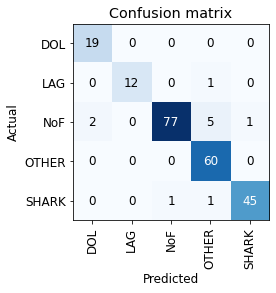

In [42]:
interp.plot_confusion_matrix()

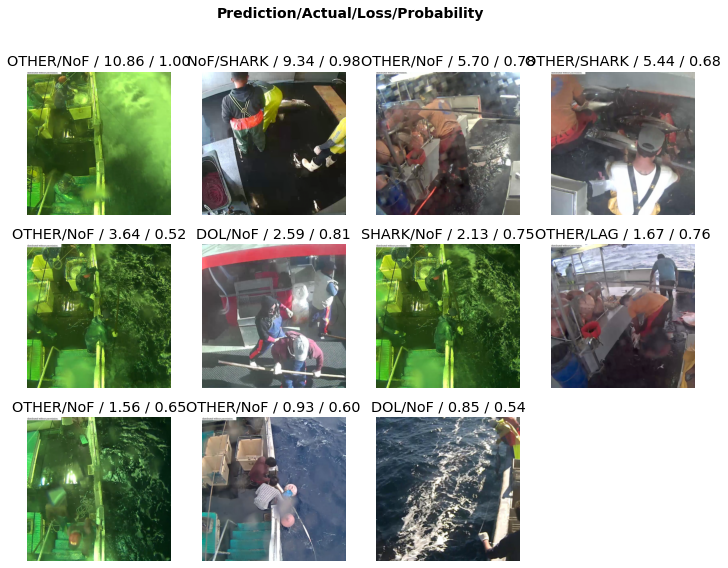

In [47]:
interp.plot_top_losses(11)

In [ ]:
interp.